# 11 - Neural Networks in Keras

by [Fabio A. González](http://dis.unal.edu.co/~fgonza/), Universidad Nacional de Colombia

version 1.0, June 2018

## Part of the class [Applied Deep Learning](https://github.com/albahnsen/AppliedDeepLearningClass)


This notebook is licensed under a [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US). 



In [1]:
import numpy as np
import pylab as pl
from sklearn.datasets.samples_generator import make_moons
import keras

%matplotlib inline

# Functions for plotting 2D data and decision regions

def plot_data(X, y):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")

def plot_decision_region(X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 30, cmap = pl.cm.coolwarm, vmin= 0, vmax=1)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")

Using TensorFlow backend.


### 1. Neural network training in Keras

We will build a multilayer network to solve the following classification problem:

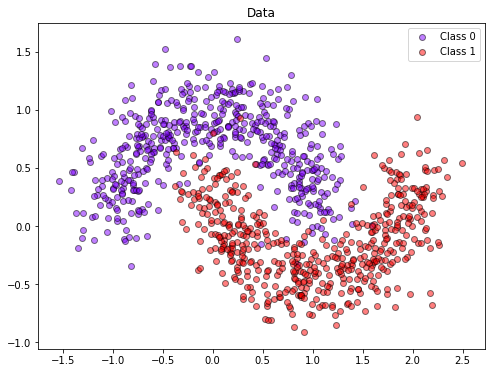

In [2]:
x_train, y_train = make_moons(n_samples=1000, noise= 0.2, random_state=3)
pl.figure(figsize=(8, 6))
plot_data(x_train, y_train)

We define a `Sequential` model. The model is built by stacking layers. The first layer is a dense layer that receives 2 inputs and has 20 neurons with `relu` activation. The second and last layer has a neuron with sigmoid activation.

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()

model.add(Dense(units=20, input_dim=2))
model.add(Activation('relu'))
model.add(Dense(units=1))
model.add(Activation('sigmoid'))

The structured of the neural network can be visualized with:

In [4]:
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_1 (Dense)                (None, 20)                  60         
______________________________________________________________________
activation_1 (Activation)      (None, 20)                  0          
______________________________________________________________________
dense_2 (Dense)                (None, 1)                   21         
______________________________________________________________________
activation_2 (Activation)      (None, 1)                   0          
Total params: 81
Trainable params: 81
Non-trainable params: 0
______________________________________________________________________


The learning process is configured with `compile`. Here we will use a cross-entropy loss function and an SGD optimizer. A the learning process will keep track of the accuracy.

In [5]:
from keras.optimizers import SGD
model.compile(loss = 'binary_crossentropy',
              optimizer = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False),
              metrics = ['accuracy'])

The model is trained by calling the function `fit`:

In [6]:
model.fit(x_train, y_train, epochs=100, verbose=2)

Epoch 1/100
 - 0s - loss: 0.5974 - acc: 0.7800
Epoch 2/100
 - 0s - loss: 0.4360 - acc: 0.8250
Epoch 3/100
 - 0s - loss: 0.3625 - acc: 0.8430
Epoch 4/100
 - 0s - loss: 0.3274 - acc: 0.8560
Epoch 5/100
 - 0s - loss: 0.3050 - acc: 0.8650
Epoch 6/100
 - 0s - loss: 0.2898 - acc: 0.8750
Epoch 7/100
 - 0s - loss: 0.2786 - acc: 0.8780
Epoch 8/100
 - 0s - loss: 0.2722 - acc: 0.8780
Epoch 9/100
 - 0s - loss: 0.2669 - acc: 0.8790
Epoch 10/100
 - 0s - loss: 0.2621 - acc: 0.8830
Epoch 11/100
 - 0s - loss: 0.2598 - acc: 0.8860
Epoch 12/100
 - 0s - loss: 0.2572 - acc: 0.8870
Epoch 13/100
 - 0s - loss: 0.2552 - acc: 0.8870
Epoch 14/100
 - 0s - loss: 0.2540 - acc: 0.8860
Epoch 15/100
 - 0s - loss: 0.2524 - acc: 0.8850
Epoch 16/100
 - 0s - loss: 0.2513 - acc: 0.8880
Epoch 17/100
 - 0s - loss: 0.2500 - acc: 0.8870
Epoch 18/100
 - 0s - loss: 0.2487 - acc: 0.8890
Epoch 19/100
 - 0s - loss: 0.2468 - acc: 0.8880
Epoch 20/100
 - 0s - loss: 0.2465 - acc: 0.8880
Epoch 21/100
 - 0s - loss: 0.2464 - acc: 0.8900
E

The trained model can be use to classify new samples 
using `predict`:

In [7]:
print(model.predict(np.array([[0, 0]])))

[[0.9812243]]


This is the decision region of the trained model:

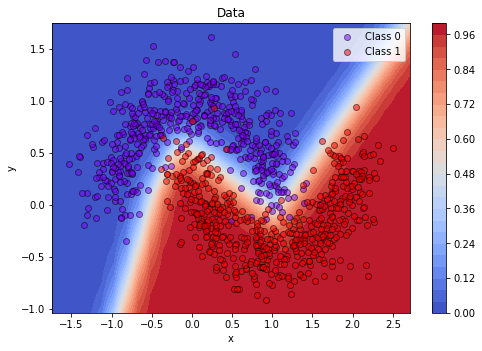

In [8]:
def pred_fun(x1, x2):
        xval = np.array([[x1, x2]])
        return model.predict(xval)[0, 0]

pl.figure(figsize = (8,16/3))    
plot_decision_region(x_train, pred_fun)
plot_data(x_train, y_train)

### 2. Training a text classifier

We will create a model to classifiy Reuters newswires
according to their topic. The original dataset is available [here](https://archive.ics.uci.edu/ml/datasets/reuters-21578+text+categorization+collection), but Keras has functions that facilitate the task of loading and preprocessing it.

In [9]:
import keras
import numpy as np
from keras.datasets import reuters
from keras.layers import Dropout
from keras.preprocessing.text import Tokenizer

max_words = 1000

print('Loading data...')
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words,
                                                         test_split=0.2)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

num_classes = np.max(y_train) + 1
print(num_classes, 'classes')


Loading data...
8982 train sequences
2246 test sequences
46 classes


Is instance is represented by a sequence of numbers which correspond to indices of the corresponding words.

In [10]:
print(x_train[101])

[1, 2, 149, 8, 25, 2, 400, 304, 200, 6, 337, 4, 342, 2, 2, 7, 2, 2, 9, 4, 342, 643, 2, 7, 2, 4, 88, 2, 31, 4, 384, 292, 211, 5, 2, 978, 220, 33, 851, 2, 11, 15, 9, 447, 7, 42, 92, 131, 276, 5, 156, 11, 15, 50, 33, 30, 2, 7, 2, 383, 29, 336, 25, 383, 29, 2, 94, 156, 4, 49, 8, 7, 788, 4, 88, 33, 2, 747, 11, 15, 197, 92, 222, 825, 5, 934, 11, 15, 2, 8, 17, 12]


The map for word to index is also provided, so it is possible to decode the instance back to text:

In [11]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
num_words = max(word_index.values()) + 1
words = ['']*num_words
for word in word_index:
    words[word_index[word]] = word
print([words[i-2] for i in x_train[101][1:]])

['', 'dlr', 'and', 'cts', '', '80', 'average', 'companies', 'in', 'income', 'of', 'make', '', '', 'said', '', '', 'a', 'of', 'make', '52', '', 'said', '', 'of', '1987', '', '2', 'of', 'sold', 'general', 'states', 'to', '', 'field', 'securities', 'was', 'agricultural', '', '3', 'it', 'a', '1988', 'said', 'as', 'april', '50', 'term', 'to', 'earlier', '3', 'it', 'but', 'was', 'with', '', 'said', '', 'previously', 'be', 'sell', 'cts', 'previously', 'be', '', 'more', 'earlier', 'of', 'which', 'and', 'said', 'commerce', 'of', '1987', 'was', '', 'august', '3', 'it', 'export', 'april', 'report', 'vice', 'to', 'beef', '3', 'it', '', 'and', '000', 'for']


Data is encoded using a bag of words representation, i.e. a matrix of size num of instances by vocabulary size

In [12]:
tokenizer = Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (8982, 1000)
x_test shape: (2246, 1000)


Labels are converted to one-hot representation:

In [13]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

y_train shape: (8982, 46)
y_test shape: (2246, 46)


Now we build a dense neural network with one hidden layer:

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Activation
model = Sequential()
model.add(Dense(256, input_shape=(max_words,)))
model.add(Activation('sigmoid'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_3 (Dense)                (None, 256)                 256256     
______________________________________________________________________
activation_3 (Activation)      (None, 256)                 0          
______________________________________________________________________
dense_4 (Dense)                (None, 46)                  11822      
______________________________________________________________________
activation_4 (Activation)      (None, 46)                  0          
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
______________________________________________________________________


We configure the learning task to use SGD as optimization:

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])


Now we can train the model using a 0.1 training validation split:

In [16]:
batch_size = 32
epochs = 5
np.random.seed(123)
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 1s 86us/step - loss: 2.4539 - acc: 0.3656 - val_loss: 2.3096 - val_acc: 0.4638
Epoch 2/5
8083/8083 [==============================] - 1s 72us/step - loss: 2.1810 - acc: 0.4423 - val_loss: 2.1799 - val_acc: 0.4538
Epoch 3/5
8083/8083 [==============================] - 1s 73us/step - loss: 2.0702 - acc: 0.4848 - val_loss: 2.0881 - val_acc: 0.4828
Epoch 4/5
8083/8083 [==============================] - 1s 72us/step - loss: 1.9903 - acc: 0.5034 - val_loss: 2.0205 - val_acc: 0.4972
Epoch 5/5
8083/8083 [==============================] - 1s 72us/step - loss: 1.9278 - acc: 0.5164 - val_loss: 1.9622 - val_acc: 0.5150


Finally, we test the performance over the test set:

In [17]:
score = model.evaluate(x_test, y_test)
print('\nTest score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 37us/step

Test score: 1.924448311169659
Test accuracy: 0.5267141585305453
